In [12]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy

device = 'cuda' if torch.cuda.is_available() else 'cpu'

print("using", device)

torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed(777)

using cuda


In [13]:
batch_size = 64
noise_dim = 100
epoch = 500

test_len = 10
test_num = 10

lr_G = 0.0002
lr_D = 0.0002
k = 1

In [14]:
mnist_train = torchvision.datasets.MNIST(
    root = '../MNIST_data',
    train = True, 
    transform = torchvision.transforms.ToTensor(), 
    download = True
)
"""
mnist_test = torchvision.datasets.MNIST(
    root = '../MNIST_data', 
    train = False, 
    transform = torchvision.transforms.ToTensor(), 
    download = True
)
"""

"\nmnist_test = torchvision.datasets.MNIST(\n    root = '../MNIST_data', \n    train = False, \n    transform = torchvision.transforms.ToTensor(), \n    download = True\n)\n"

In [15]:
data_loader = torch.utils.data.DataLoader(
    dataset = mnist_train,
    shuffle = True,
    batch_size = batch_size,
    drop_last = True,
)

In [16]:
class discriminator(torch.nn.Module): # 28x28 size inputs -> true/false(classification)
    def __init__(self) -> None:
        super().__init__()
        self.act = torch.nn.LeakyReLU()
        self.fc1 = torch.nn.Linear(784, 256, bias=False)
        self.fc2 = torch.nn.Linear(256, 256, bias=False)
        self.fc3 = torch.nn.Linear(256, 1, bias=False)
        self.sig = torch.nn.Sigmoid()
        self.dropout = torch.nn.Dropout(0.1)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.xavier_uniform_(self.fc3.weight)
    
    def forward(self, x):
        out = x.view(-1, 784)
        out = self.fc1(out)
        out = self.act(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.act(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.sig(out)
        out = out.view(-1)
        return out


In [17]:
class generator(torch.nn.Module): # 100 size noise input -> 28 * 28 image
    def __init__(self, noisedim) -> None:
        super().__init__()
        self.noisedim = noisedim
        self.LRelu = torch.nn.LeakyReLU()
        self.fc1 = torch.nn.Linear(noisedim, 256, bias=False)
        self.fc2 = torch.nn.Linear(256, 256, bias=False)
        self.fc3 = torch.nn.Linear(256, 784, bias=False)
        self.Tanh = torch.nn.Tanh()
        self.dropout = torch.nn.Dropout(0.1)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.xavier_uniform_(self.fc3.weight)
    
    def forward(self, x):
        out = x.view(-1, self.noisedim)
        out = self.fc1(out)
        out = self.LRelu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.LRelu(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.Tanh(out)
        out = out.view(-1, 784)
        return out


In [18]:
def generate_noise(noisenum, noisedim):
    return torch.randn(noisenum, noisedim).to(device)

In [19]:
def generate_labels(labelnum):
    return torch.zeros(labelnum).to(device), torch.ones(labelnum).to(device)

In [20]:
G = generator(noise_dim).to(device) #generator
D = discriminator().to(device) #discriminator
criterion = torch.nn.BCELoss()
G_optim = torch.optim.Adam(G.parameters(), lr = lr_G)
D_optim = torch.optim.Adam(D.parameters(), lr = lr_D)
noise_for_print = generate_noise(test_len, noise_dim)
fake_labels, real_labels = generate_labels(batch_size)
print_per = epoch / test_num
idx = 1

EPOCH : 1 GLOSS: 3.5578274726867676 DLOSS: 0.28226134181022644


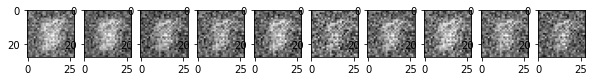

EPOCH : 2 GLOSS: 1.6457240581512451 DLOSS: 0.34122174978256226
EPOCH : 3 GLOSS: 1.2145769596099854 DLOSS: 0.44085371494293213
EPOCH : 4 GLOSS: 1.0869643688201904 DLOSS: 0.5252507328987122
EPOCH : 5 GLOSS: 0.8746380805969238 DLOSS: 0.6039890050888062
EPOCH : 6 GLOSS: 0.9417695999145508 DLOSS: 0.7091168165206909
EPOCH : 7 GLOSS: 0.7501242756843567 DLOSS: 0.728900671005249
EPOCH : 8 GLOSS: 0.7661267518997192 DLOSS: 0.6661590933799744
EPOCH : 9 GLOSS: 0.9619325399398804 DLOSS: 0.6059820652008057
EPOCH : 10 GLOSS: 0.693132758140564 DLOSS: 0.8018876910209656
EPOCH : 11 GLOSS: 0.8832826614379883 DLOSS: 0.8015812635421753
EPOCH : 12 GLOSS: 0.6730941534042358 DLOSS: 0.8413059711456299
EPOCH : 13 GLOSS: 0.7031203508377075 DLOSS: 0.9032365083694458
EPOCH : 14 GLOSS: 0.8708523511886597 DLOSS: 0.7731391191482544
EPOCH : 15 GLOSS: 0.7696345448493958 DLOSS: 0.7916297912597656
EPOCH : 16 GLOSS: 0.7622790336608887 DLOSS: 0.8320480585098267
EPOCH : 17 GLOSS: 1.001587152481079 DLOSS: 0.8877969980239868
E

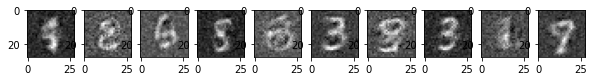

EPOCH : 52 GLOSS: 0.7753890752792358 DLOSS: 0.8241198658943176
EPOCH : 53 GLOSS: 0.6649847626686096 DLOSS: 0.9400765299797058
EPOCH : 54 GLOSS: 0.7463523745536804 DLOSS: 0.7455301880836487
EPOCH : 55 GLOSS: 0.7726434469223022 DLOSS: 0.7781600952148438
EPOCH : 56 GLOSS: 0.7447364330291748 DLOSS: 0.7223964333534241
EPOCH : 57 GLOSS: 0.7413120269775391 DLOSS: 0.7522115111351013
EPOCH : 58 GLOSS: 0.7506360411643982 DLOSS: 0.8123998641967773
EPOCH : 59 GLOSS: 0.7294594645500183 DLOSS: 0.8573808670043945
EPOCH : 60 GLOSS: 0.791759729385376 DLOSS: 0.7684037685394287
EPOCH : 61 GLOSS: 0.7904567718505859 DLOSS: 0.8214012980461121
EPOCH : 62 GLOSS: 0.7538455724716187 DLOSS: 0.7622286677360535
EPOCH : 63 GLOSS: 0.6999778747558594 DLOSS: 0.7689310312271118
EPOCH : 64 GLOSS: 0.7782845497131348 DLOSS: 0.7255408763885498
EPOCH : 65 GLOSS: 0.7208443284034729 DLOSS: 0.8220114707946777
EPOCH : 66 GLOSS: 0.7315791845321655 DLOSS: 0.8356783390045166
EPOCH : 67 GLOSS: 0.7617430686950684 DLOSS: 0.8964782953

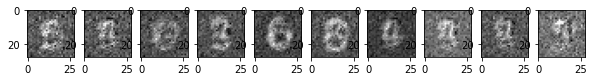

EPOCH : 102 GLOSS: 0.731736958026886 DLOSS: 0.6863678693771362
EPOCH : 103 GLOSS: 0.8060855865478516 DLOSS: 0.6755677461624146
EPOCH : 104 GLOSS: 0.9251416921615601 DLOSS: 0.7197331786155701
EPOCH : 105 GLOSS: 0.711883544921875 DLOSS: 0.700671374797821
EPOCH : 106 GLOSS: 0.7239009141921997 DLOSS: 0.7300623059272766
EPOCH : 107 GLOSS: 1.0085161924362183 DLOSS: 0.5997239351272583
EPOCH : 108 GLOSS: 0.7722123861312866 DLOSS: 0.7210181951522827
EPOCH : 109 GLOSS: 1.136833667755127 DLOSS: 0.5688263177871704
EPOCH : 110 GLOSS: 0.9282136559486389 DLOSS: 0.6686890721321106
EPOCH : 111 GLOSS: 0.7151067852973938 DLOSS: 0.7656081914901733
EPOCH : 112 GLOSS: 0.6458845734596252 DLOSS: 0.7926691174507141
EPOCH : 113 GLOSS: 0.8568970561027527 DLOSS: 0.6066251397132874
EPOCH : 114 GLOSS: 0.7930865287780762 DLOSS: 0.6334699392318726
EPOCH : 115 GLOSS: 0.6812371015548706 DLOSS: 0.7705625891685486
EPOCH : 116 GLOSS: 0.805229663848877 DLOSS: 0.6959319114685059
EPOCH : 117 GLOSS: 0.6098117828369141 DLOSS: 

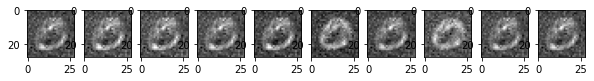

EPOCH : 152 GLOSS: 1.0893607139587402 DLOSS: 0.7806354761123657
EPOCH : 153 GLOSS: 1.621701717376709 DLOSS: 0.7012243270874023
EPOCH : 154 GLOSS: 0.9372778534889221 DLOSS: 0.6602481603622437
EPOCH : 155 GLOSS: 0.7632245421409607 DLOSS: 0.653120219707489
EPOCH : 156 GLOSS: 0.6952975988388062 DLOSS: 0.694490909576416
EPOCH : 157 GLOSS: 1.1663587093353271 DLOSS: 0.6923519372940063
EPOCH : 158 GLOSS: 0.87080979347229 DLOSS: 0.5921247601509094
EPOCH : 159 GLOSS: 0.745569109916687 DLOSS: 0.64972984790802
EPOCH : 160 GLOSS: 0.9002858400344849 DLOSS: 0.7189002633094788
EPOCH : 161 GLOSS: 0.760376513004303 DLOSS: 0.6757064461708069
EPOCH : 162 GLOSS: 0.7380892038345337 DLOSS: 0.7613756656646729
EPOCH : 163 GLOSS: 0.7416120767593384 DLOSS: 0.6637446284294128
EPOCH : 164 GLOSS: 0.8049588203430176 DLOSS: 0.6202287077903748
EPOCH : 165 GLOSS: 0.7019425630569458 DLOSS: 0.6934232711791992
EPOCH : 166 GLOSS: 0.6642060279846191 DLOSS: 0.7543501853942871
EPOCH : 167 GLOSS: 0.7809157371520996 DLOSS: 0.62

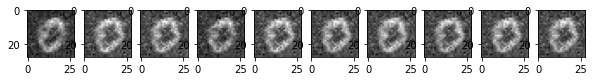

EPOCH : 202 GLOSS: 0.7932370901107788 DLOSS: 0.6368631720542908
EPOCH : 203 GLOSS: 0.7533718943595886 DLOSS: 0.7178218960762024
EPOCH : 204 GLOSS: 1.175945520401001 DLOSS: 0.42258358001708984
EPOCH : 205 GLOSS: 0.6784838438034058 DLOSS: 0.7152841687202454
EPOCH : 206 GLOSS: 0.8702189922332764 DLOSS: 0.5845036506652832
EPOCH : 207 GLOSS: 0.7597754597663879 DLOSS: 0.6419693231582642
EPOCH : 208 GLOSS: 0.6730855107307434 DLOSS: 0.7412937879562378
EPOCH : 209 GLOSS: 0.88006591796875 DLOSS: 0.5889282822608948
EPOCH : 210 GLOSS: 0.9763388633728027 DLOSS: 0.6159685254096985
EPOCH : 211 GLOSS: 1.0697308778762817 DLOSS: 0.5471707582473755
EPOCH : 212 GLOSS: 1.6536071300506592 DLOSS: 0.38305097818374634
EPOCH : 213 GLOSS: 0.6747983694076538 DLOSS: 0.7275689840316772
EPOCH : 214 GLOSS: 0.7252127528190613 DLOSS: 0.7136898040771484
EPOCH : 215 GLOSS: 0.7842375040054321 DLOSS: 0.6537094712257385
EPOCH : 216 GLOSS: 0.7923864126205444 DLOSS: 0.7853637933731079
EPOCH : 217 GLOSS: 0.7374287843704224 DLO

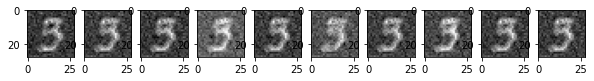

EPOCH : 252 GLOSS: 0.753771185874939 DLOSS: 0.9521138072013855
EPOCH : 253 GLOSS: 0.6379748582839966 DLOSS: 0.8682529926300049
EPOCH : 254 GLOSS: 0.7533227801322937 DLOSS: 0.701183021068573
EPOCH : 255 GLOSS: 0.69798743724823 DLOSS: 0.7411400675773621
EPOCH : 256 GLOSS: 0.6041655540466309 DLOSS: 1.2960604429244995
EPOCH : 257 GLOSS: 0.6955538988113403 DLOSS: 0.8106374144554138
EPOCH : 258 GLOSS: 1.4128897190093994 DLOSS: 0.36838579177856445
EPOCH : 259 GLOSS: 0.7277458310127258 DLOSS: 0.6982703804969788
EPOCH : 260 GLOSS: 0.6908698081970215 DLOSS: 0.69544517993927
EPOCH : 261 GLOSS: 0.7190572023391724 DLOSS: 0.677558183670044
EPOCH : 262 GLOSS: 0.685766875743866 DLOSS: 0.7248246669769287
EPOCH : 263 GLOSS: 0.7871615290641785 DLOSS: 0.6324917674064636
EPOCH : 264 GLOSS: 0.710020899772644 DLOSS: 0.7000604867935181
EPOCH : 265 GLOSS: 0.7541950941085815 DLOSS: 0.6723568439483643
EPOCH : 266 GLOSS: 0.7108503580093384 DLOSS: 0.7507567405700684
EPOCH : 267 GLOSS: 1.074263572692871 DLOSS: 0.49

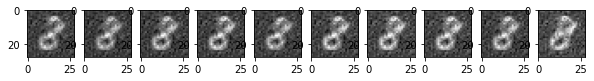

EPOCH : 302 GLOSS: 0.8059912919998169 DLOSS: 0.6275780200958252
EPOCH : 303 GLOSS: 0.7059184312820435 DLOSS: 0.6935893893241882
EPOCH : 304 GLOSS: 0.8364269733428955 DLOSS: 0.7209911942481995
EPOCH : 305 GLOSS: 0.8722869753837585 DLOSS: 0.6333995461463928
EPOCH : 306 GLOSS: 0.6693322658538818 DLOSS: 0.7554474472999573
EPOCH : 307 GLOSS: 0.8300781846046448 DLOSS: 0.8293530344963074
EPOCH : 308 GLOSS: 0.6812485456466675 DLOSS: 0.758844792842865
EPOCH : 309 GLOSS: 0.5723880529403687 DLOSS: 1.0686283111572266
EPOCH : 310 GLOSS: 0.7674193978309631 DLOSS: 0.8255671858787537
EPOCH : 311 GLOSS: 0.919580340385437 DLOSS: 0.8557738065719604
EPOCH : 312 GLOSS: 0.6820486783981323 DLOSS: 0.7121549248695374
EPOCH : 313 GLOSS: 0.6584001183509827 DLOSS: 0.7459046244621277
EPOCH : 314 GLOSS: 0.7415086627006531 DLOSS: 0.6521583795547485
EPOCH : 315 GLOSS: 1.1921721696853638 DLOSS: 0.6939237713813782
EPOCH : 316 GLOSS: 0.7457703351974487 DLOSS: 0.692681074142456
EPOCH : 317 GLOSS: 0.9321538209915161 DLOSS

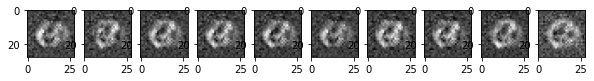

EPOCH : 352 GLOSS: 0.9084372520446777 DLOSS: 0.5546405911445618
EPOCH : 353 GLOSS: 0.8118712902069092 DLOSS: 0.6338331699371338
EPOCH : 354 GLOSS: 0.730843722820282 DLOSS: 0.7072098255157471
EPOCH : 355 GLOSS: 0.8435144424438477 DLOSS: 0.7084678411483765
EPOCH : 356 GLOSS: 0.5340360999107361 DLOSS: 1.0013223886489868
EPOCH : 357 GLOSS: 0.7078427076339722 DLOSS: 0.7379022836685181
EPOCH : 358 GLOSS: 0.6876866817474365 DLOSS: 0.8640308976173401
EPOCH : 359 GLOSS: 0.9848977327346802 DLOSS: 0.5634031295776367
EPOCH : 360 GLOSS: 0.717430830001831 DLOSS: 0.678317666053772
EPOCH : 361 GLOSS: 0.8514590263366699 DLOSS: 0.604042112827301
EPOCH : 362 GLOSS: 0.735123872756958 DLOSS: 0.7086016535758972
EPOCH : 363 GLOSS: 0.704139769077301 DLOSS: 0.9389575719833374
EPOCH : 364 GLOSS: 0.768344521522522 DLOSS: 0.6454046964645386
EPOCH : 365 GLOSS: 0.7795243263244629 DLOSS: 0.6878103613853455
EPOCH : 366 GLOSS: 0.870694637298584 DLOSS: 0.6033442616462708
EPOCH : 367 GLOSS: 0.9671196341514587 DLOSS: 0.5

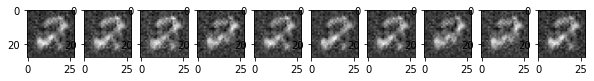

EPOCH : 402 GLOSS: 0.6734753847122192 DLOSS: 0.8580911755561829
EPOCH : 403 GLOSS: 0.7964257597923279 DLOSS: 0.9255385398864746
EPOCH : 404 GLOSS: 0.944686770439148 DLOSS: 0.7053121328353882
EPOCH : 405 GLOSS: 0.9973438382148743 DLOSS: 0.6790297031402588
EPOCH : 406 GLOSS: 0.9606716632843018 DLOSS: 0.9124675989151001
EPOCH : 407 GLOSS: 0.8817567825317383 DLOSS: 0.5394604206085205
EPOCH : 408 GLOSS: 0.7084434628486633 DLOSS: 0.7259315848350525
EPOCH : 409 GLOSS: 0.7634671926498413 DLOSS: 0.6580188274383545
EPOCH : 410 GLOSS: 0.9970578551292419 DLOSS: 0.5845217108726501
EPOCH : 411 GLOSS: 0.7888247966766357 DLOSS: 0.7395750284194946
EPOCH : 412 GLOSS: 0.8346570134162903 DLOSS: 0.7004861831665039
EPOCH : 413 GLOSS: 1.031777262687683 DLOSS: 0.5274365544319153
EPOCH : 414 GLOSS: 1.0132917165756226 DLOSS: 0.684712827205658
EPOCH : 415 GLOSS: 0.7266931533813477 DLOSS: 0.747901439666748
EPOCH : 416 GLOSS: 0.7110958099365234 DLOSS: 0.7267560362815857
EPOCH : 417 GLOSS: 0.9247421026229858 DLOSS:

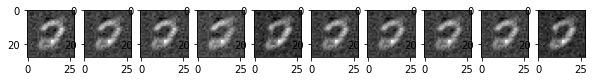

EPOCH : 452 GLOSS: 0.7787550687789917 DLOSS: 0.7475243806838989
EPOCH : 453 GLOSS: 0.661237359046936 DLOSS: 0.7376092076301575
EPOCH : 454 GLOSS: 0.8665308356285095 DLOSS: 1.2633631229400635
EPOCH : 455 GLOSS: 0.9821755886077881 DLOSS: 0.6276882290840149
EPOCH : 456 GLOSS: 0.8582428693771362 DLOSS: 0.5840795040130615
EPOCH : 457 GLOSS: 0.6797809600830078 DLOSS: 0.7618319392204285
EPOCH : 458 GLOSS: 1.0721346139907837 DLOSS: 0.5875550508499146
EPOCH : 459 GLOSS: 0.954588770866394 DLOSS: 0.5042322278022766
EPOCH : 460 GLOSS: 1.0878788232803345 DLOSS: 0.6839557886123657
EPOCH : 461 GLOSS: 0.6593393087387085 DLOSS: 0.8069353103637695
EPOCH : 462 GLOSS: 0.8349968194961548 DLOSS: 0.6854909658432007
EPOCH : 463 GLOSS: 0.7857553958892822 DLOSS: 0.6193978786468506
EPOCH : 464 GLOSS: 0.8959583640098572 DLOSS: 0.5619456768035889
EPOCH : 465 GLOSS: 0.7119396924972534 DLOSS: 1.050113558769226
EPOCH : 466 GLOSS: 1.0497820377349854 DLOSS: 0.6642305850982666
EPOCH : 467 GLOSS: 0.9201614260673523 DLOSS

In [21]:
real_images_arr = []

for i, (image, label) in enumerate(data_loader):
    real_images_arr.append(image.to(device).view(-1, 784))

for i in range(epoch):
    for real_images in real_images_arr:
        random_noises = generate_noise(batch_size, noise_dim)
        fake_images = G(random_noises)
        real_outs = D(real_images)
        fake_outs = D(fake_images)
        
        D_loss = criterion(real_outs, real_labels) + criterion(fake_outs, fake_labels)
        
        D_optim.zero_grad()
        G_optim.zero_grad()
        D_loss.backward()
        D_optim.step()

        
        fake_images = G(random_noises)
        outputs = D(fake_images)
        G_loss = criterion(outputs, real_labels)

        D_optim.zero_grad()
        G_optim.zero_grad()
        G_loss.backward()
        G_optim.step()

    print("EPOCH :", i + 1, "GLOSS:", G_loss.item(), "DLOSS:", D_loss.item())

    if i % print_per == 0:
        generated_images = G(noise_for_print).view(test_len, 28, 28)
        plt.figure(figsize = (10, 100))
        for j in range(test_len):
            plt.subplot(1, test_len, j + 1)
            idx = idx + 1
            plt.imshow(generated_images.detach().cpu().numpy()[j], cmap = 'gray')
        plt.show()

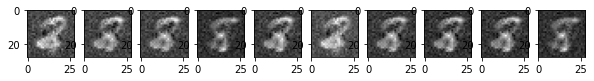

In [34]:
noise_for_print = generate_noise(test_len, noise_dim)
generated_images = G(noise_for_print).view(test_len, 28, 28)
plt.figure(figsize = (10, 100))
for j in range(test_len):
    plt.subplot(1, test_len, j + 1)
    idx = idx + 1
    plt.imshow(generated_images.detach().cpu().numpy()[j], cmap = 'gray')
plt.show()

In [ ]:
"""
테스트해본 환경 : batch 60000, bias = True -> 잘 학습되지 않음
batch 200, bias = True -> 대략적인 이미지가 보이기는 함
batch 64, bias = True -> 역시 대략적인 이미지가 보이고, batch size가 줄어듬에 따라 당연히 학습 시간이 많이 늘어났음
batch 64, bias = False -> 대략적인 이미지가 보임, False로 bias를 두는 것이 맞는 것 같기는 한데 눈에 띄는 성능 향상은 없어보임
"""